In [82]:
import TurbPy as tb
from TurbPy.imports import *

# deck = 'KH_Lv1di/'
# deck = 'KH_new/'
# deck = 'KH_400ppc_200wci2/'
deck = 'KH_200ppc_200wci/'
# deck = 'KH_beta0.1/'
# deck = 'turb2/'

dirs = '/pscratch/sd/g/goodwill/' + deck
figs = '/pscratch/sd/g/goodwill/Fig/' + deck
info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)
twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))
lx_de = info['Lx/de']
ly_de = info['Ly/de']
lx_di = info['Lx/di']
ly_di = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])
lxr_di = np.linspace(0, lx_di, nx)
lyr_di = np.linspace(0, ly_di, ny)
lxc_di = np.linspace(0, lx_di, nx-200)
lyc_di = np.linspace(0, ly_di, ny)
lxr_de = np.linspace(0, lx_de, nx)
lyr_de = np.linspace(0, ly_de, ny)
dx = lx_de/nx
dy = ly_de/ny

In [83]:
t = 510
QD = tb.QD_calc(dirs, t, sp = 'electron')
Qw = tb.Qw_calc(dirs, t, sp = 'electron')
QJe, QJi, QJ = tb.QJ_calc(dirs, t)
print(QD.shape)

(1080, 2560)


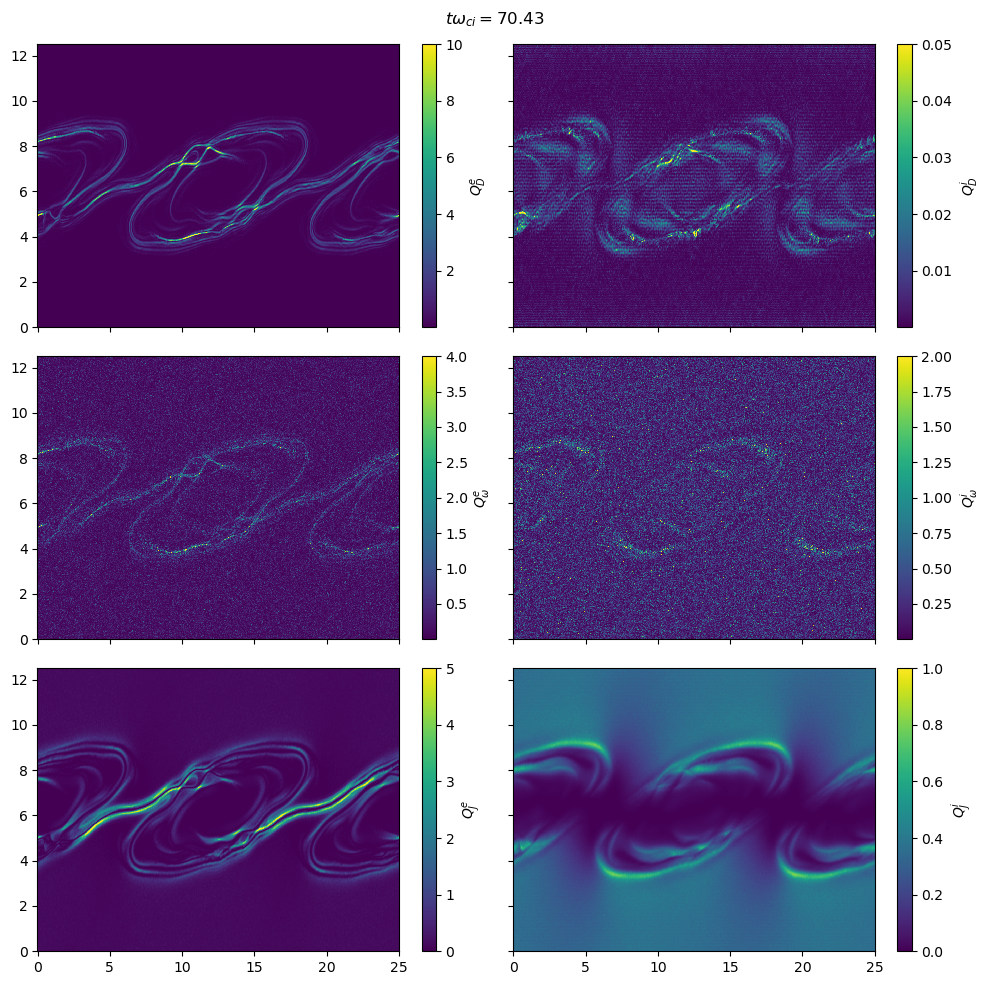

In [84]:
fig, ax = plt.subplots(3,2, figsize = (10, 10), sharex = True, sharey = True, layout = 'tight')

t = 510
QD = tb.QD_calc(dirs, t, sp = 'electron')
Qw = tb.Qw_calc(dirs, t, sp = 'electron')
QJe, QJi, QJ = tb.QJ_calc(dirs, t)

ax0 = ax[0,0].pcolormesh(lyc_di, lxc_di, QD , vmax = 10, label = r'$Q_D^e$')
ax1 = ax[1,0].pcolormesh(lyc_di, lxc_di, Qw , vmax = 4 , label = r'$Q_\omega^e$')
ax2 = ax[2,0].pcolormesh(lyc_di, lxc_di, QJe, vmax = 5 , label = r'$Q_J^e$')

QD = tb.QD_calc(dirs, t, sp = 'ion')
Qw = tb.Qw_calc(dirs, t, sp = 'ion')

ax3 = ax[0,1].pcolormesh(lyc_di, lxc_di, QD ,vmax =  0.05, label = r'$Q_D^i$')
ax4 = ax[1,1].pcolormesh(lyc_di, lxc_di, Qw ,vmax =  2, label = r'$Q_\omega^i$')
ax5 = ax[2,1].pcolormesh(lyc_di, lxc_di, QJi,vmax =  1, label = r'$Q_J^i$')


fig.colorbar(ax0, label = r'$Q_D^e$')
fig.colorbar(ax1, label = r'$Q_\omega^e$')
fig.colorbar(ax2, label = r'$Q_J^e$')
fig.colorbar(ax3, label = r'$Q_D^i$')
fig.colorbar(ax4, label = r'$Q_\omega^i$')
fig.colorbar(ax5, label = r'$Q_J^i$')

fig.suptitle(r'$t \omega_{ci} =$'f'{np.round(twci[t],2)}')

fig.savefig(figs + 'invar_'f'{t}''.png')

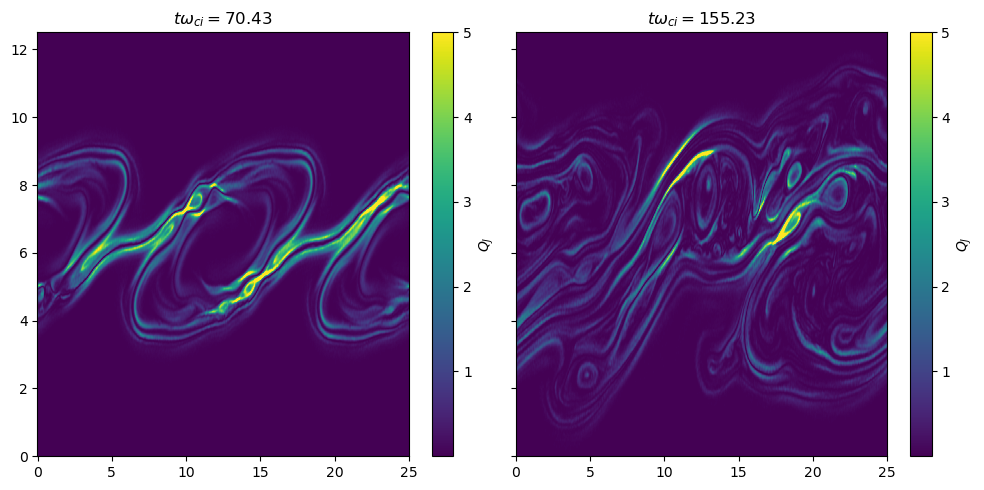

In [91]:
fig, ax = plt.subplots(1,2, figsize = (10, 5), sharex = True, sharey = True, layout = 'tight')

t = 510
QJe, QJi, QJ = tb.QJ_calc(dirs, t)

ax0 = ax[0].pcolormesh(lyc_di, lxc_di, QJ, vmax = 5 , label = r'$Q_J$')


t = 1124
QJe, QJi, QJ = tb.QJ_calc(dirs, t)

ax1 = ax[1].pcolormesh(lyc_di, lxc_di, QJ,vmax =  5, label = r'$Q_J$')


fig.colorbar(ax0, label = r'$Q_J$')
fig.colorbar(ax1, label = r'$Q_J$')

ax[0].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[510],2)}')
ax[1].set_title(r'$t \omega_{ci} =$'f'{np.round(twci[1124],2)}')

fig.savefig(figs + 'QJ.png')